# Table of Contents

# 1. Import Libraries

# 2. Import Dataframe

# 3. Assess & Address PII Data

# 4. Create a Regional Subset

# 5. Create an Exclusion Flag for the Low-Activity Customers

# 6. Build Customer Profile Based upon Customer Age

# 7. Build Customer Profile Based upon Spending Power

# 8. Build Customer Profile Based upon 'canned goods' Purchase Behaviour

# 9. Build Customer Profile Based upon Dependants

# 10. Export as Final Dataframe

# 1. Import Libraries

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# define path
path = r'/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 4/Instacart Basket Analysis'

# 2. Import Dataframe

In [4]:
# import dataframe
df = pd.read_pickle(os.path.join(path, '2 Data', 'Prepared Data', 'ords_prods_customer_merge_4.9_part_one.pkl'))

In [5]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0_x            int64  
 1   product_id              int64  
 2   product_name            object 
 3   aisle_id                int64  
 4   department_id           int64  
 5   prices                  float64
 6   order_id                int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  object 
 13  add_to_cart_order       int64  
 14  reordered               int64  
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  average_price           float

In [8]:
# checking the import

pd.options.display.max_columns=None
df.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,first_name,surname,Gender,STATE,age,date_joined,number_of_dependants,fam_status,spending_power
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regular days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,21.0,4,0,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


# 3. Assess & Address PII Data

In [9]:
# dropping the 'First Name' and 'surname' columns due to PII

df_latest=df.drop(columns=['first_name','surname'])

In [10]:
# checking the result

pd.options.display.max_columns=None
df_latest.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,STATE,age,date_joined,number_of_dependants,fam_status,spending_power
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regular days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,21.0,4,0,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


# 4. Create a Regional Subset

In [11]:
region=[]
for value in df_latest['STATE']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Idaho','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append('West')
    else:
        region.append('South')

In [12]:
# combining the above loop with the dataframe & creating a new column

df_latest['region']=region

In [13]:
# checking the result

pd.options.display.max_columns=None
df_latest.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,STATE,age,date_joined,number_of_dependants,fam_status,spending_power,region
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regular days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,21.0,4,0,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [14]:
# checking the spending habits between the regions (crossing 'region' with 'spending flag')

spending_habit=pd.crosstab(df_latest['region'],df_latest['spending_flag'],dropna=False)

In [15]:
spending_habit

spending_flag,High spender,Low spender
region,,
Midwest,141516,6824881
Northeast,108225,5614511
South,232970,11825108
West,151534,7506114


Text(0.5, 1.0, 'Regional Spending Habit')

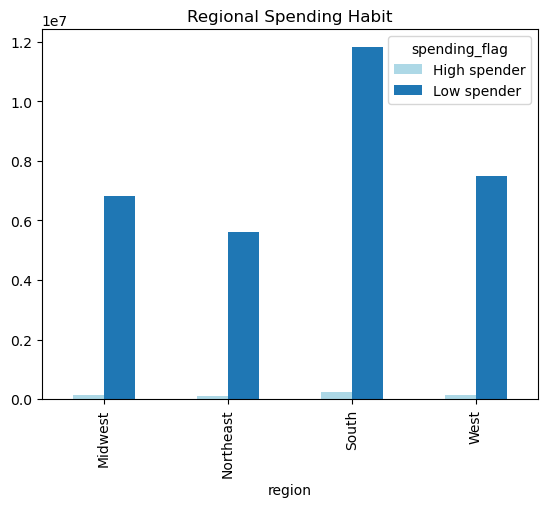

In [16]:
# creating a bar chart of the above 'spending_habit' table

spending_habit_viz=spending_habit.plot.bar(color=['lightblue','tab:blue'])
plt.title('Regional Spending Habit')

In [17]:
# exporting the above visualization

spending_habit_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','regional_spending_habit.png'),bbox_inches='tight')

# 5. Create an Exclusion Flag for the Low-Activity Customers

In [18]:
# checking the shape of the 'df_latest' dataframe

df_latest.shape

(32404859, 33)

In [19]:
# creating a new column for low-activity customers (less than 5 orders)

df_latest.loc[df_latest['max_order']>=5,'customer_activity']='High-activity Customer'

In [20]:
df_latest.loc[df_latest['max_order']<5,'customer_activity']='Low-activity Customer'

In [21]:
# checking the result

df_latest['customer_activity'].value_counts(dropna=False)

High-activity Customer    30964564
Low-activity Customer      1440295
Name: customer_activity, dtype: int64

In [22]:
# creating a subset of the Low-activity customers

low_activity_cust=df_latest[df_latest['customer_activity']=='Low-activity Customer']

In [23]:
# checking the shape

low_activity_cust.shape

(1440295, 34)

In [24]:
# exporting the Low-activity customers subset

low_activity_cust.to_pickle(os.path.join(path,'2 Data','Prepared Data','Low_activity_customers.pkl'))

In [25]:
# creating a subset for the High-activity customers

high_activity_cust=df_latest[df_latest['customer_activity']=='High-activity Customer']

In [26]:
# checking the shape

high_activity_cust.shape

(30964564, 34)

In [28]:
# exporting the High-activity customers subset

high_activity_cust.to_pickle(os.path.join(path,'2 Data','Prepared Data','High_activity_customers.pkl'))

# 6. Build Customer Profile Based upon Customer Age

In [29]:
# checking the size of the 'df_latest' dataframe

df_latest.shape

(32404859, 34)

In [31]:
# creating a flag as per age groups

df_latest.loc[df_latest['age']<35,'age_group']='Young Age'

In [34]:
df_latest.loc[(df_latest['age']>=35) & (df_latest['age']<60),'age_group']='Middle Age'

In [36]:
df_latest.loc[df_latest['age']>=60,'age_group']='Old Age'

In [37]:
df_latest['age_group'].value_counts(dropna=False)

Middle Age    12709949
Old Age       11067255
Young Age      8627655
Name: age_group, dtype: int64

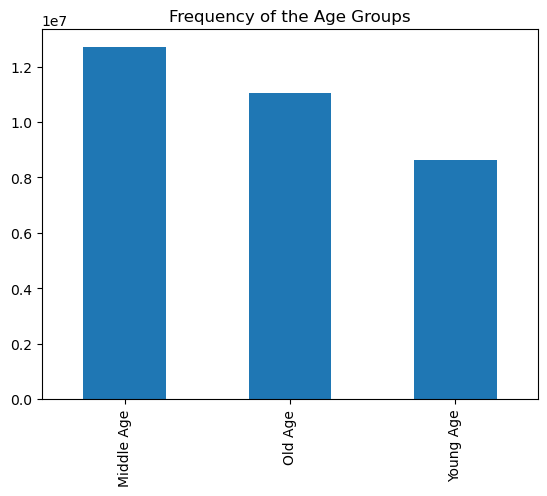

In [38]:
# creating a visualization

age_grp_bar=df_latest['age_group'].value_counts().plot.bar(title='Frequency of the Age Groups')

In [40]:
# exporting the visualization

age_grp_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_groups_bar.png'),bbox_inches='tight')

In [41]:
df_latest.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,STATE,age,date_joined,number_of_dependants,fam_status,spending_power,region,customer_activity,age_group
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Old Age
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regular days,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Old Age
2,907,907,Premium Sliced Bacon,106,12,20.0,3160996,138,prior,1,5,13,21.0,4,0,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Old Age
3,907,907,Premium Sliced Bacon,106,12,20.0,2254091,138,prior,10,5,14,6.0,1,1,High-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Old Age
4,1000,1000,Apricots,18,10,12.9,505689,138,prior,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regular days,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High-activity Customer,Old Age


In [42]:
# checking 'age_group' with region

age_region=pd.crosstab(df_latest['region'],df_latest['age_group'],dropna=False)

In [43]:
age_region

age_group,Middle Age,Old Age,Young Age
region,,,
Midwest,2774232,2342470,1849695
Northeast,2214091,1973103,1535542
South,4684644,4146803,3226631
West,3036982,2604879,2015787


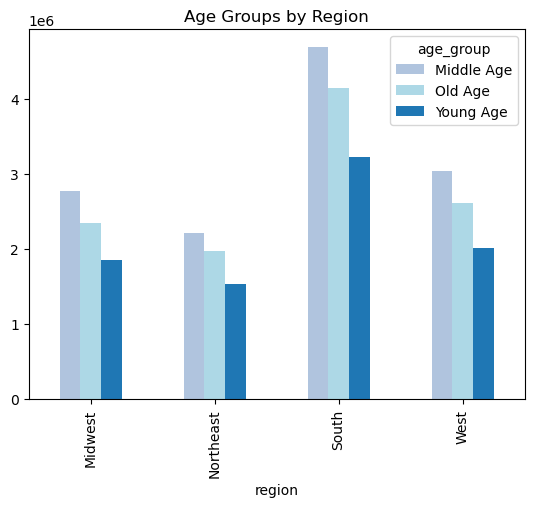

In [44]:
# visualizing the above 'age_region' crosstab with a bar chart

age_region_bar=age_region.plot.bar(title='Age Groups by Region',color=['lightsteelblue','lightblue','tab:blue'])

In [45]:
# exporting the above 'age_region_bar' visualization

age_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_region.png'),bbox_inches='tight')

In [46]:
# checking 'age_group' with 'order_frequency_flag'

age_order_freq=pd.crosstab(df_latest['order_frequency_flag'],df_latest['age_group'],dropna=False)

In [47]:
age_order_freq

age_group,Middle Age,Old Age,Young Age
order_frequency_flag,,,
Frequent customer,8046230,7017934,5450314
Non-frequent customer,1796548,1567808,1218890
Regular customer,2867171,2481513,1958451


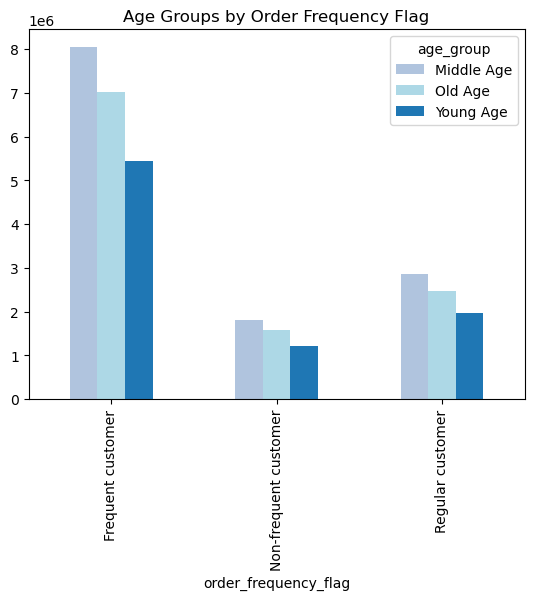

In [48]:
# visualizing the above 'age_order_freq' crosstab with a bar chart

age_order_freq_viz=age_order_freq.plot.bar(title='Age Groups by Order Frequency Flag',color=['lightsteelblue','lightblue','tab:blue'])

In [49]:
# exporting the above 'age_order_freq_viz' visualization

age_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_order_freq.png'),bbox_inches='tight')

In [50]:
# checking the 'age_group' with the 'spending_flag'

age_spending=pd.crosstab(df_latest['spending_flag'],df_latest['age_group'],dropna=False)

In [51]:
age_spending

age_group,Middle Age,Old Age,Young Age
spending_flag,,,
High spender,259896,216735,157614
Low spender,12450053,10850520,8470041


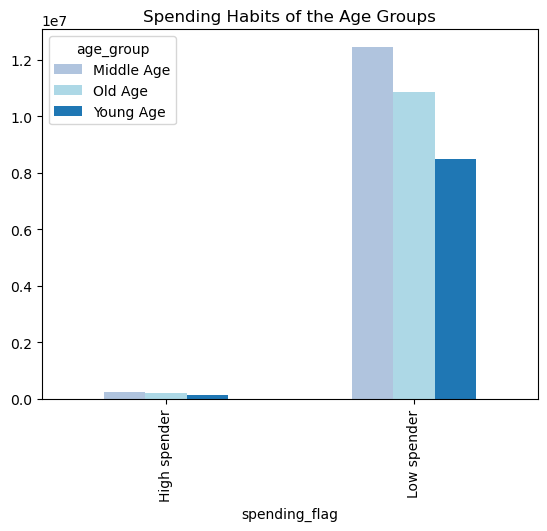

In [52]:
# creating a visualisation of the above 'age_spending' crosstab with a bar chart

age_spending_viz=age_spending.plot.bar(title='Spending Habits of the Age Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [53]:
# exporting the above 'age_spending_viz' visualization

age_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_spending.png'),bbox_inches='tight')

In [54]:
# checking the 'age_group' with the 'order_hour_of_day'

age_hour_of_day=pd.crosstab(df_latest['order_hour_of_day'],df_latest['age_group'],dropna=False)

In [55]:
age_hour_of_day

age_group,Middle Age,Old Age,Young Age
order_hour_of_day,,,
0,86294,72606,59869
1,46100,38094,31506
2,26430,23601,19344
3,19367,17789,14125
4,19359,19233,14650
5,33549,30992,23420
6,111957,98623,79913
7,345033,308187,237834
8,675410,588280,454428


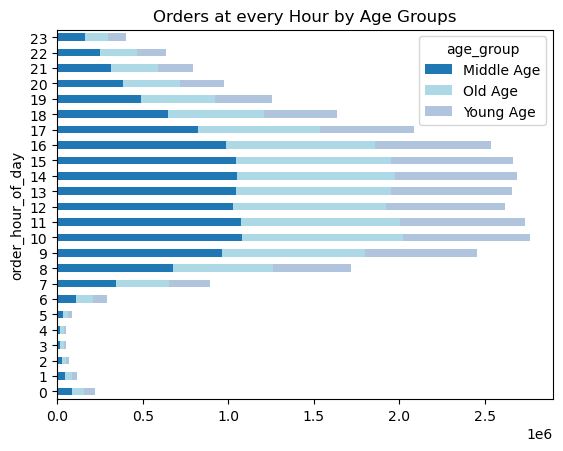

In [56]:
# visualising the above 'age_hour_of_day' crosstab

age_hour_of_day_viz=age_hour_of_day.plot.barh(title='Orders at every Hour by Age Groups',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [58]:
# exporting the above visualisation

age_hour_of_day_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_hour_of_day.png'),bbox_inches='tight')

In [59]:
# importing the 'department_wrangled.csv' dataset

df_dept=pd.read_csv(os.path.join(path,'2 Data','Prepared Data','departments_wrangled.csv'),index_col=False)

In [61]:
df_dept.info

<bound method DataFrame.info of     Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing>

In [62]:
# renaming the 'unnamed: 0' column to 'department_id'

df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [63]:
# checking the import

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [64]:
# merging 'df_dept' dataframe with the 'df_latest' dataframe

df_latest_all=df_latest.merge(df_dept,on='department_id')

In [65]:
# creating a crosstab between 'department' and 'age_group'

age_dept=pd.crosstab(df_latest_all['department'],df_latest_all['age_group'],dropna=False)

In [66]:
age_dept

age_group,Middle Age,Old Age,Young Age
department,,,
alcohol,60411,50664,42621
babies,169798,142912,111092
bakery,459656,400020,312752
beverages,1056314,923708,708101
breakfast,275099,238897,189037
bulk,13468,11803,9302
canned goods,418429,363738,285891
dairy eggs,2115361,1838082,1445304
deli,412726,359502,279021


In [67]:
age_dept= age_dept.sort_values(by=['Middle Age'], ascending=True)

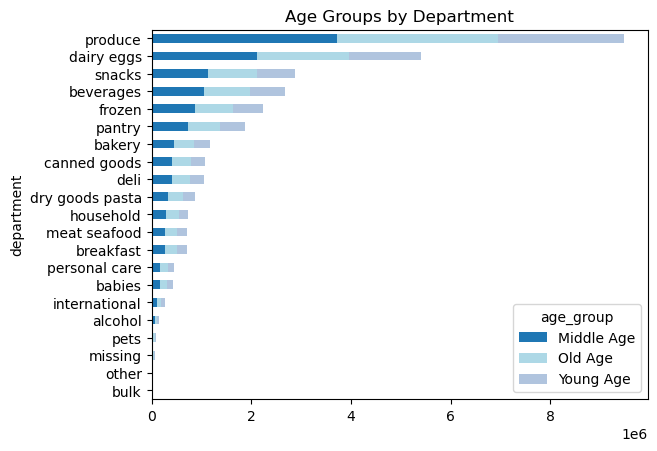

In [68]:
# creating a visualisation for the above crosstab

age_dept_viz=age_dept.plot.barh(title='Age Groups by Department',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [69]:
# exporting the above visualization

age_dept_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_dept.png'),bbox_inches='tight')

In [70]:
# creating a crosstab between 'age_group' and 'price_range_loc'

age_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['age_group'],dropna=False)

In [71]:
age_price_range

age_group,Middle Age,Old Age,Young Age
price_range_loc,,,
High-range product,163298,143516,110864
Low-range product,3972310,3456614,2697397
Mid-range product,8574341,7467125,5819394


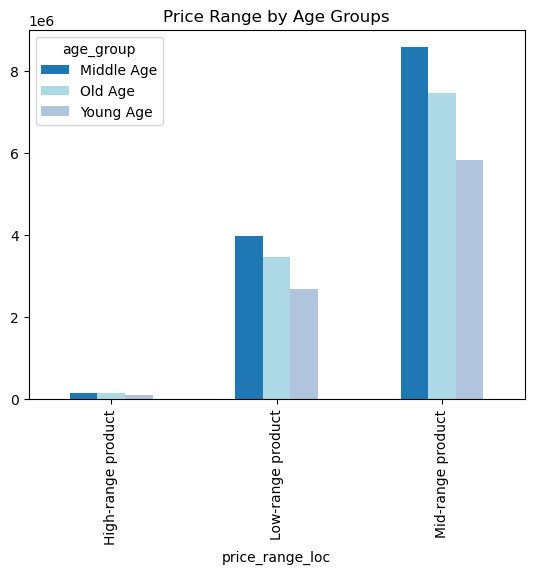

In [72]:
# creating a visualisation for 'age_price_range' crosstab

age_price_range_viz=age_price_range.plot.bar(title='Price Range by Age Groups',color=['tab:blue','lightblue','lightsteelblue'])

In [73]:
# exporting the above visualization

age_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_price_range.png'),bbox_inches='tight')

# 7. Build Customer Profile Based upon Spending Power

In [75]:
df_latest_all['spending_power'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: spending_power, dtype: float64

In [88]:
# creating a flag as per Spending Power groups

df_latest_all.loc[(df_latest_all['spending_power']>=25000)&(df_latest_all['spending_power']<75000),'spending_power_Groups']= 'Low Income'

In [89]:
df_latest_all.loc[(df_latest_all['spending_power']>=75000)&(df_latest_all['spending_power']<150000),'spending_power_Groups']= 'Medium Income'

In [90]:
df_latest_all.loc[(df_latest_all['spending_power']>=150000),'spending_power_Groups']= 'High Income'

In [91]:
# checking the result

df_latest_all['spending_power_Groups'].value_counts(dropna=False)

Medium Income    17910512
Low Income       10442766
High Income       4051581
Name: spending_power_Groups, dtype: int64

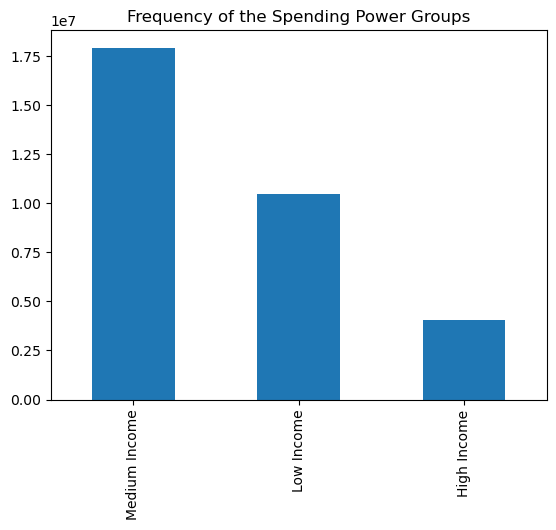

In [92]:
# creating a visualization of the 'spending_power_Groups' column

spending_power_Groups_bar=df_latest_all['spending_power_Groups'].value_counts().plot.bar(title='Frequency of the Spending Power Groups')

In [85]:
# exporting the visualisation

spending_power_Groups_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','spending_power_Groups_bar.png'),bbox_inches='tight')

In [95]:
# checking the 'spending_power_Groups' with 'region'

spending_power_region=pd.crosstab(df_latest_all['region'],df_latest_all['spending_power_Groups'],dropna=False)

In [98]:
income_region

spending_power_Groups,High Income,Low Income,Medium Income
region,,,
Midwest,872495,2227147,3866755
Northeast,706788,1822149,3193799
South,1499535,3898323,6660220
West,972763,2495147,4189738


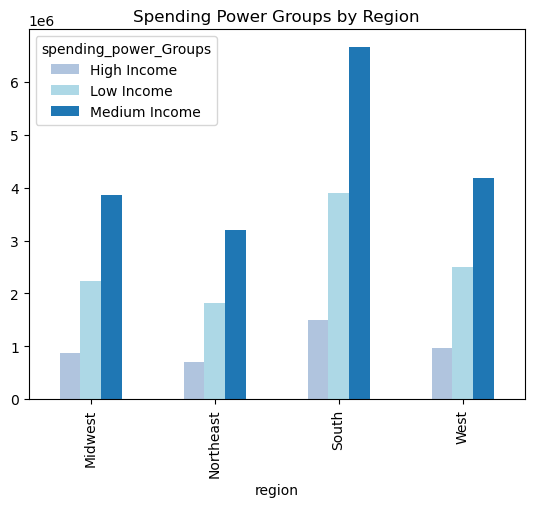

In [99]:
# creating a visualisation for the above 'spending_power_region' crosstab

spending_power_region_viz=spending_power_region.plot.bar(title='Spending Power Groups by Region',color=['lightsteelblue','lightblue','tab:blue'])

In [100]:
# exporting the above visualisation

spending_power_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','spending_power_region.png'),bbox_inches='tight')

In [101]:
# checking the 'spending_power_Groups' with 'order_frequency_flag'

spending_power_order_freq=pd.crosstab(df_latest_all['order_frequency_flag'],df_latest_all['spending_power_Groups'],dropna=False)

In [103]:
spending_power_order_freq

spending_power_Groups,High Income,Low Income,Medium Income
order_frequency_flag,,,
Frequent customer,2616672,6518434,11379372
Non-frequent customer,536225,1585669,2461352
Regular customer,898684,2338663,4069788


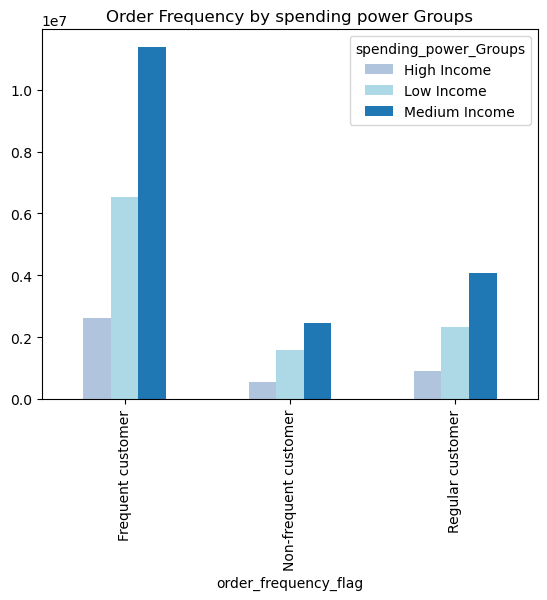

In [104]:
# creating a visualisation of the above 'spending_power_order_freq' crosstab

spending_power_order_freq_viz=spending_power_order_freq.plot.bar(title='Order Frequency by spending power Groups', color=['lightsteelblue','lightblue','tab:blue'])

In [106]:
# exporting the above visualisation

spending_power_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','spending_power_order_freq.png'),bbox_inches='tight')

In [107]:
# checking the 'spending_power_Groups' with 'spending_flag'

spending_power_spending=pd.crosstab(df_latest_all['spending_flag'],df_latest_all['spending_power_Groups'],dropna=False)

In [108]:
spending_power_spending

spending_power_Groups,High Income,Low Income,Medium Income
spending_flag,,,
High spender,397954,35655,200636
Low spender,3653627,10407111,17709876


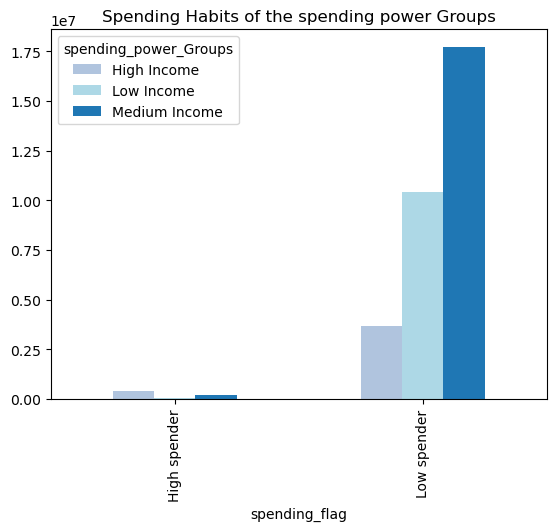

In [109]:
# creating a visualisation of the 'spending_power_spending' crosstab

spending_power_spending_viz=spending_power_spending.plot.bar(title='Spending Habits of the spending power Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [110]:
# exporting the above visualisation

spending_power_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','income_spending.png'),bbox_inches='tight')

In [111]:
# checking the 'age_group' with the 'spending_power_Groups'

age_spending_power=pd.crosstab(df_latest_all['age_group'],df_latest_all['spending_power_Groups'],dropna=False)

In [112]:
age_spending_power

spending_power_Groups,High Income,Low Income,Medium Income
age_group,,,
Middle Age,1883557,3408662,7417730
Old Age,2091236,1722730,7253289
Young Age,76788,5311374,3239493


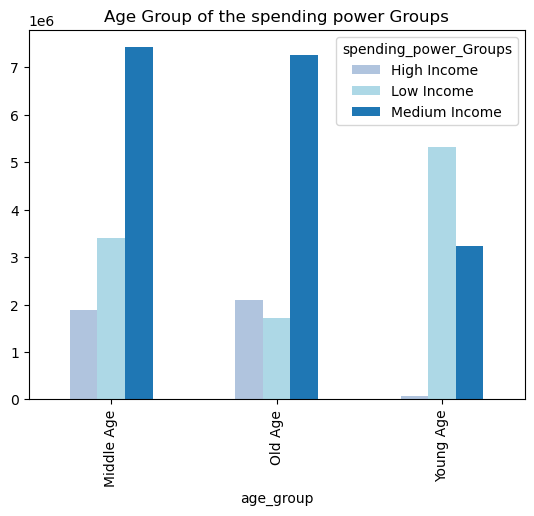

In [114]:
# creating a visualisation of the 'age_spending_power' crosstab

age_spending_power_viz=age_spending_power.plot.bar(title='Age Group of the spending power Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [115]:
# exporting the above visualisation

age_spending_power_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','age_spending_power.png'),bbox_inches='tight')

In [116]:
# checking the 'spending_power_Groups' with 'department'

spending_power_dept=pd.crosstab(df_latest_all['department'],df_latest_all['spending_power_Groups'],dropna=False)

In [117]:
spending_power_dept

spending_power_Groups,High Income,Low Income,Medium Income
department,,,
alcohol,24953,48180,80563
babies,54433,119538,249831
bakery,154054,360332,658042
beverages,325147,958035,1404941
breakfast,86857,245791,370385
bulk,3773,12369,18431
canned goods,138758,314806,614494
dairy eggs,684341,1680064,3034342
deli,131002,336307,583940


In [118]:
spending_power_dept= spending_power_dept.sort_values(by=['Medium Income'], ascending=True)

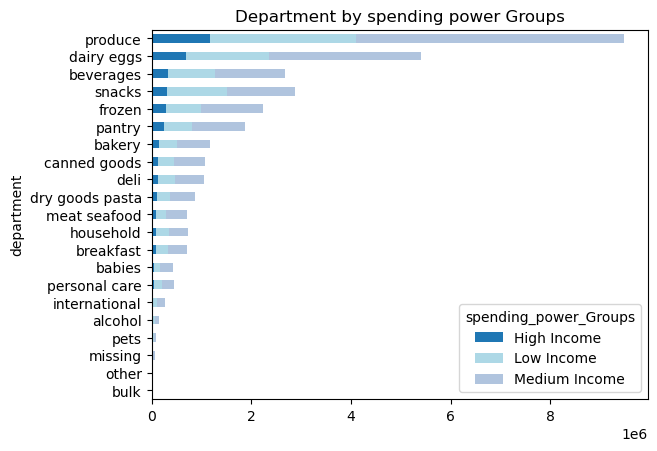

In [119]:
# creating a visualisation of the 'income_dept' crosstab

spending_power_dept_viz=spending_power_dept.plot.barh(title='Department by spending power Groups',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [120]:
# Exporting the above visualisation

spending_power_dept_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','spending_power_dept.png'),bbox_inches='tight')

In [121]:
# creating a crosstab between 'spending_power_Groups' and 'price_range_loc'

spending_power_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['spending_power_Groups'],dropna=False)

In [123]:
spending_power_price_range

spending_power_Groups,High Income,Low Income,Medium Income
price_range_loc,,,
High-range product,59799,106263,251616
Low-range product,1206685,3607938,5311698
Mid-range product,2785097,6728565,12347198


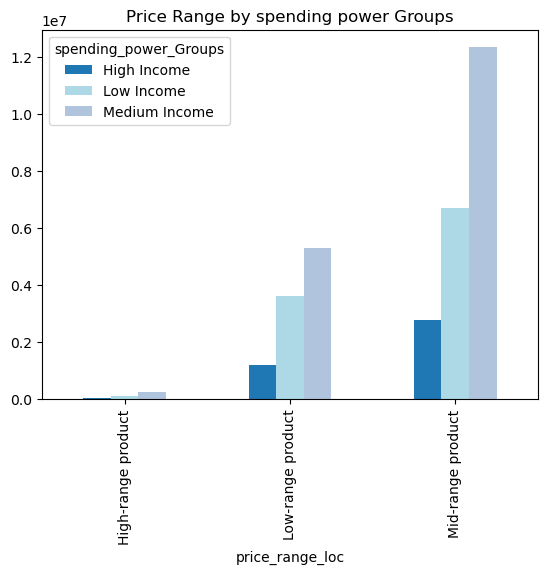

In [124]:
# creating a visualization of 'spending_power_price_range'

spending_power_price_range_viz=spending_power_price_range.plot.bar(title='Price Range by spending power Groups',color=['tab:blue','lightblue','lightsteelblue'])

In [125]:
# exporting the above visualisation

spending_power_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','spending_power_price_range.png'),bbox_inches='tight')

# 8. Build Customer Profile Based upon 'canned goods' Purchase Behaviour

In [126]:
# creating a flag to profile 'canned goods' users vs 'canned good' non-users

df_latest_all.loc[df_latest_all['department_id']==15,'canned_goods_customers']='Canned Goods user'

In [127]:
df_latest_all.loc[df_latest_all['department_id']!=15, 'canned_goods_customers']='Canned Goods Non-user'

In [128]:
# To identify customers who are canned goods users we need the user_id column's information

latest_canned_goods_columns = df_latest_all.loc[df_latest_all['canned_goods_customers'] == 'Canned Goods user', 'user_id'].unique()

In [129]:
# Updating the "canned_goods_customers" column

df_latest_all.loc[df_latest_all['user_id'].isin(latest_canned_goods_columns), 'canned_goods_customers'] = 'Canned Goods user'

In [130]:
df_latest_all['canned_goods_customers'].value_counts(dropna=False)

Canned Goods user        27094927
Canned Goods Non-user     5309932
Name: canned_goods_customers, dtype: int64

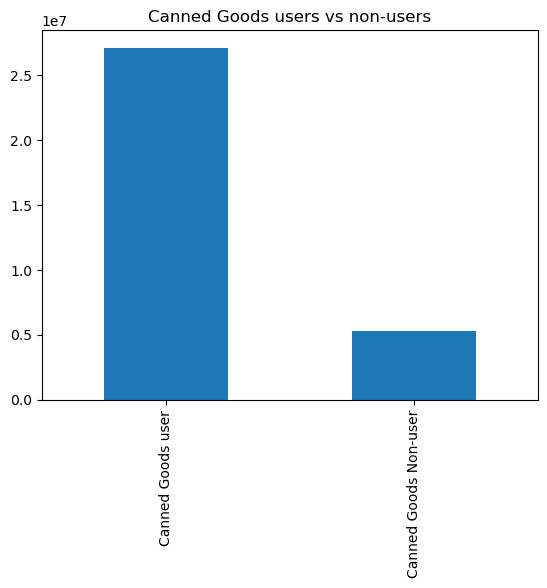

In [131]:
# creating a visualisation of the 'canned goods_customers' column

canned_goods_viz=df_latest_all['canned_goods_customers'].value_counts().plot.bar(title='Canned Goods users vs non-users')

In [132]:
# exporting the above visualisation

canned_goods_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_goods_users.png'),bbox_inches='tight')

In [133]:
# creating a crosstab between 'canned_goods_customers' and 'region'

canned_goods_region=pd.crosstab(df_latest_all['region'],df_latest_all['canned_goods_customers'],dropna=False)

In [134]:
canned_goods_region

canned_goods_customers,Canned Goods Non-user,Canned Goods user
region,,
Midwest,1156505,5809892
Northeast,932636,4790100
South,1961087,10096991
West,1259704,6397944


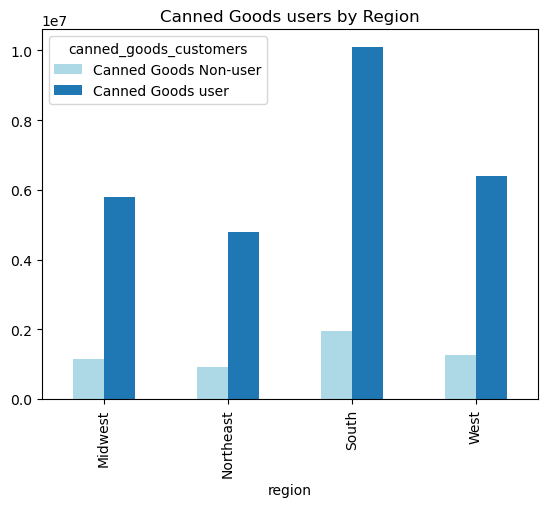

In [135]:
# creating a visualisation of the 'canned_goods_region' crosstab

canned_goods_region_viz=canned_goods_region.plot.bar(title='Canned Goods users by Region',color=['lightblue','tab:blue'])

In [136]:
# exporting the above visualisation

canned_goods_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_goods_region.png'),bbox_inches='tight')

In [137]:
# creating a crosstab between 'canned_goods_customers' and 'order_frequency_flag'

canned_order_freq=pd.crosstab(df_latest_all['order_frequency_flag'],df_latest_all['canned_goods_customers'],dropna=False)

In [138]:
canned_order_freq

canned_goods_customers,Canned Goods Non-user,Canned Goods user
order_frequency_flag,,
Frequent customer,2818059,17696419
Non-frequent customer,1216451,3366795
Regular customer,1275422,6031713


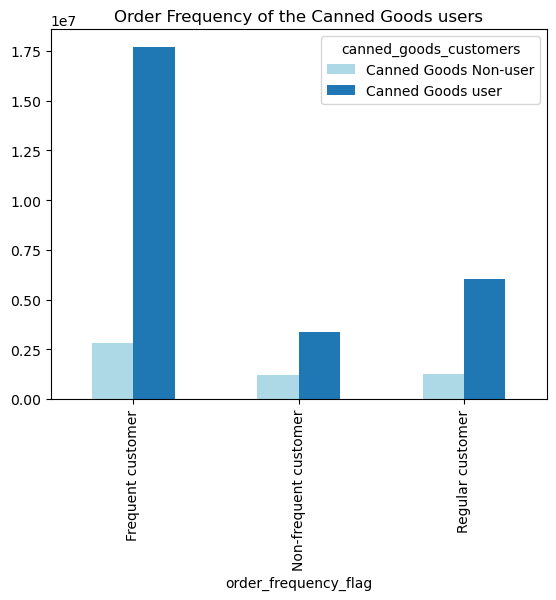

In [139]:
# creating a visualisation of the above crosstab

canned_order_freq_viz=canned_order_freq.plot.bar(title='Order Frequency of the Canned Goods users',color=['lightblue','tab:blue'])

In [140]:
# exporting the above visualisation

canned_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_order_frequency.png'),bbox_inches='tight')

In [141]:
# checking the canned_goods users by age

canned_good_age=pd.crosstab(df_latest_all['age_group'],df_latest_all['canned_goods_customers'],dropna=False)

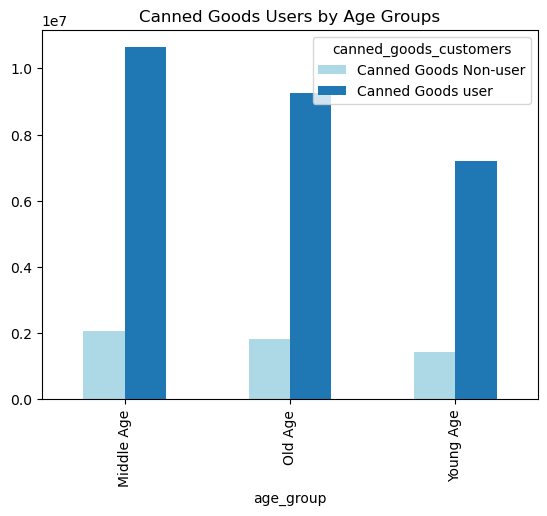

In [142]:
# creating a visualisation of the above crosstab

canned_good_age_viz=canned_good_age.plot.bar(title='Canned Goods Users by Age Groups',color=['lightblue','tab:blue'])

In [143]:
# exporting the above visualisation

canned_good_age_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_good_age.png'),bbox_inches='tight')

In [146]:
# checking the 'canned_goods_customers' with the 'spending_power_Groups'

canned_good_spending_power=pd.crosstab(df_latest_all['spending_power_Groups'],df_latest_all['canned_goods_customers'],dropna=False)

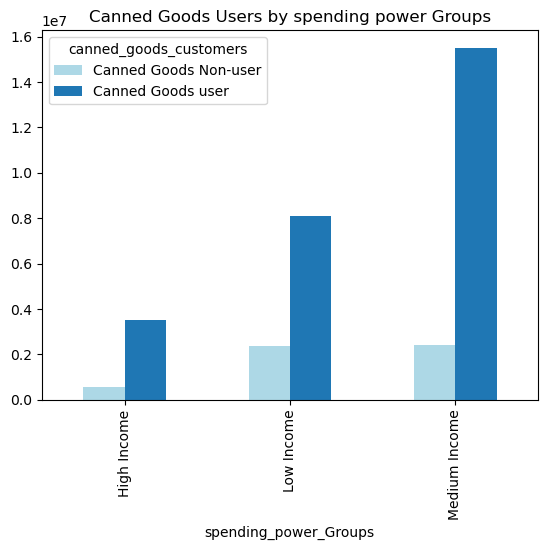

In [147]:
# creating a visualization of the above crosstab

canned_good_spending_power_viz=canned_good_income.plot.bar(title='Canned Goods Users by spending power Groups',color=['lightblue','tab:blue'])

In [148]:
# exporting the above visualisation

canned_good_spending_power_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_good_spending_power.png'),bbox_inches='tight')

In [149]:
# creating a crosstab between 'canned_goods_customers' and 'price_range_loc'

canned_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['canned_goods_customers'],dropna=False)

In [150]:
canned_price_range

canned_goods_customers,Canned Goods Non-user,Canned Goods user
price_range_loc,,
High-range product,44845,372833
Low-range product,1785210,8341111
Mid-range product,3479877,18380983


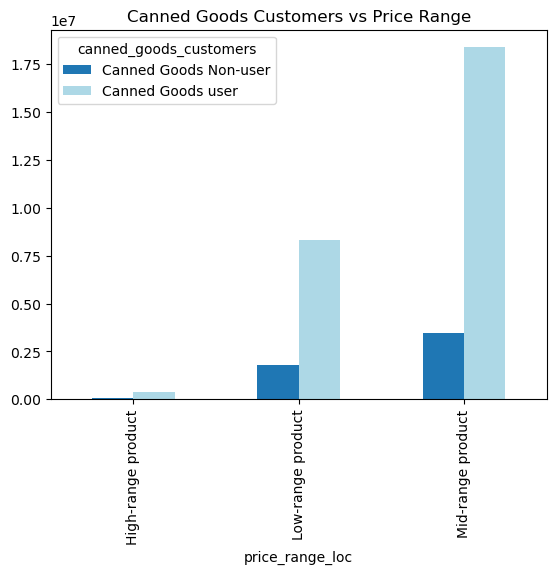

In [151]:
# creating a visualisation of 'canned_price_range'

canned_price_range_viz=canned_price_range.plot.bar(title='Canned Goods Customers vs Price Range',color=['tab:blue','lightblue','lightsteelblue'])

In [152]:
# exporting the above visualisation

canned_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','canned_price_range.png'),bbox_inches='tight')

# 9. Build Customer Profile Based upon Dependants

In [154]:
# creating a flag based on the number of dependants

df_latest_all.loc[(df_latest_all['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_latest_all['number_of_dependants']==0), 'Family_Status_Flag'] = 'Single with NO Dependants'

In [155]:
df_latest_all.loc[(df_latest_all['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_latest_all['number_of_dependants'] >=1), 'Family_Status_Flag'] = 'Single WITH Dependants'

In [156]:
df_latest_all.loc[(df_latest_all['fam_status'] == 'married') & (df_latest_all['number_of_dependants'] == 1), 'Family_Status_Flag'] = 'Married with NO Dependants'

In [157]:
df_latest_all.loc[(df_latest_all['fam_status'] == 'married') & (df_latest_all['number_of_dependants'] > 1), 'Family_Status_Flag'] = 'Married WITH Dependants'

In [158]:
# checking the frequency of the flag

df_latest_all['Family_Status_Flag'].value_counts(dropna=False)

Married WITH Dependants       15205849
Single with NO Dependants      8097503
Married with NO Dependants     7550904
Single WITH Dependants         1550603
Name: Family_Status_Flag, dtype: int64

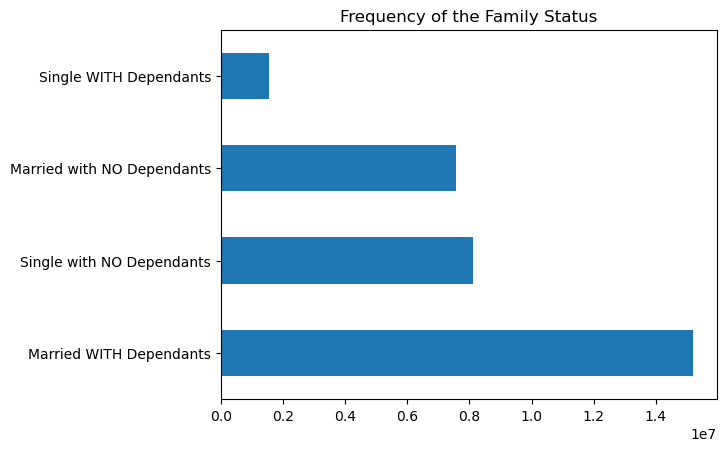

In [160]:
# creating a visualisation of the 'Family_Status_Flag'

family_status_viz=df_latest_all['Family_Status_Flag'].value_counts().plot.barh(title='Frequency of the Family Status')

In [161]:
# exporting the above visualisation

family_status_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_status.png'),bbox_inches='tight')

In [162]:
# checking the 'Family_Status_Flag' with 'region'

family_status_region=pd.crosstab(df_latest_all['region'],df_latest_all['Family_Status_Flag'],dropna=False)

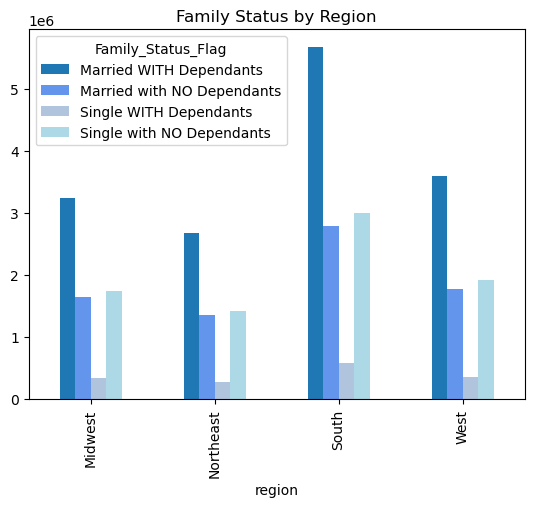

In [163]:
# creating the above visualization

family_status_region_viz=family_status_region.plot.bar(title='Family Status by Region',color=['tab:blue','cornflowerblue','lightsteelblue','lightblue'])

In [165]:
# exporting the above visualisation

family_status_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_status_region.png'),bbox_inches='tight')

In [166]:
# checking the 'Family_Status_Flag' with 'spending_flag'

family_status_spending=pd.crosstab(df_latest_all['spending_flag'],df_latest_all['Family_Status_Flag'],dropna=False)

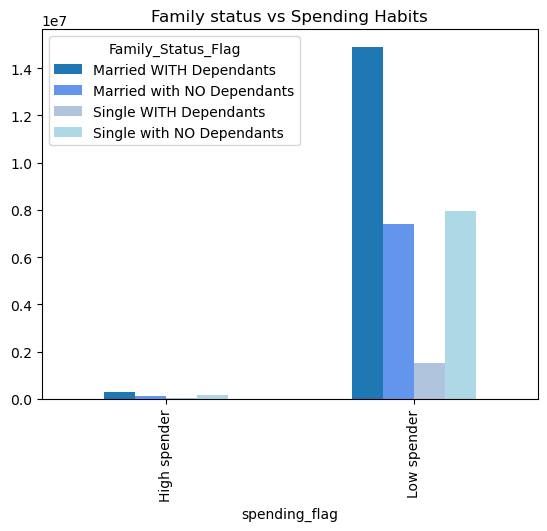

In [167]:
# creating a visualization for the 'family_status_spending' crosstab

family_status_spending_viz=family_status_spending.plot.bar(title='Family status vs Spending Habits',color=['tab:blue','cornflowerblue','lightsteelblue','lightblue'])

In [168]:
# exporting the above visualisation

family_status_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_status_spending.png'),bbox_inches='tight')

In [169]:
# checking the 'Family_Status_Flag' with 'order_hour_of_day'

family_status_hour=pd.crosstab(df_latest_all['order_hour_of_day'],df_latest_all['Family_Status_Flag'],dropna=False)

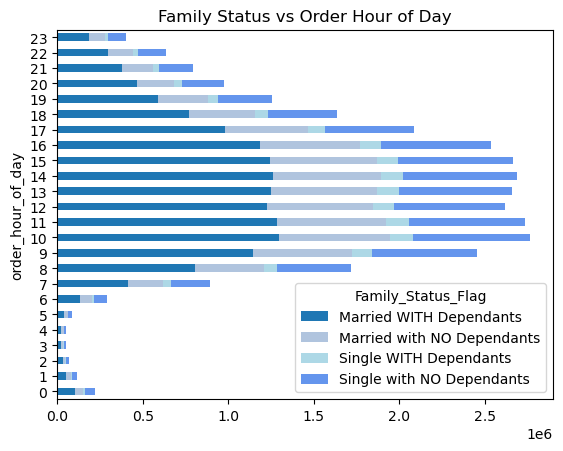

In [170]:
# creating the 'family_status_hour' visualization

family_status_hour_viz=family_status_hour.plot.barh(stacked=True,title='Family Status vs Order Hour of Day',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [171]:
# exporting the above visualisation

family_status_hour_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_status_hour.png'),bbox_inches='tight')

In [172]:
# checking the 'Family_Status_Flag' with 'department'

family_status_department=pd.crosstab(df_latest_all['department'],df_latest_all['Family_Status_Flag'],dropna=False)

In [173]:
family_status_department=family_status_department.sort_values(by=['Married WITH Dependants'], ascending=True)

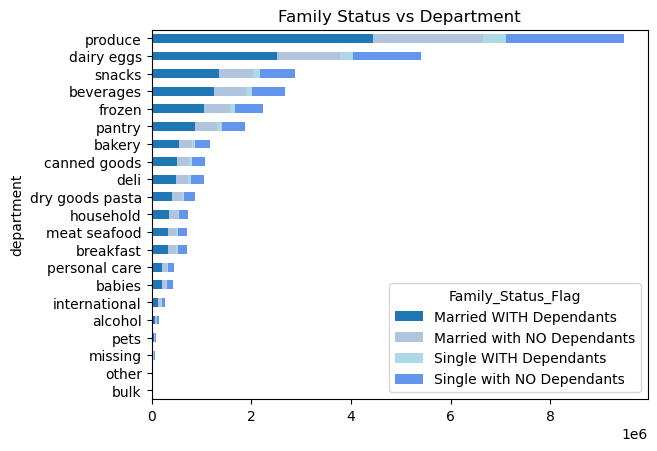

In [174]:
# creating the visualisation of 'family_status_department'

family_status_department_viz=family_status_department.plot.barh(stacked=True,title='Family Status vs Department',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [175]:
# exporting the above visualisation

family_status_department_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','family_status_dept.png'),bbox_inches='tight')

In [176]:
# creating a crosstab between 'Family_Status_Flag' and 'price_range_loc'

fam_status_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['Family_Status_Flag'],dropna=False)

In [177]:
fam_status_price_range

Family_Status_Flag,Married WITH Dependants,Married with NO Dependants,Single WITH Dependants,Single with NO Dependants
price_range_loc,,,,
High-range product,197790,97743,19968,102177
Low-range product,4755666,2355870,483461,2531324
Mid-range product,10252393,5097291,1047174,5464002


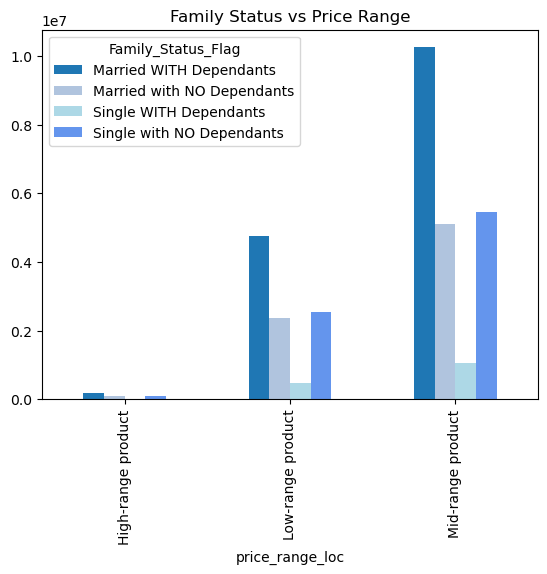

In [178]:
# creating a visualisation for the above crosstab

fam_status_price_range_viz=fam_status_price_range.plot.bar(title='Family Status vs Price Range',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [179]:
# exporting the above visualisation

fam_status_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualisations','fam_status_price_range.png'),bbox_inches='tight')

# 10. Export as Final Dataframe

In [181]:
df_latest_all.to_pickle(os.path.join(path,'2 Data','Prepared Data','final_dataset.pkl'))